In [92]:
from wok.parse import DictionaryParser, IDSParser
from pathlib import Path
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os

__file__ = Path(os.path.abspath('__file__'))
data_path = __file__.parent/'wok'/'data'
print(data_path)

idsp = IDSParser(data_path=data_path)

#####
chars = {}

temp_ids_chars = ""
for i, (k, v) in enumerate(idsp.ids_score_dict.items(), start=1):
    chars[k] = i
    temp_ids_chars += v['ids'][0]
temp_ids_chars = list(temp_ids_chars)

ids_chars_count = dict(sorted(dict(Counter(temp_ids_chars)).items(), key=lambda x: x[1], reverse=True))

#####
ids_chars = list(ids_chars_count.keys())

/home/shaneoh/workspace/radical-clustering/wok/data
ids_dictionary created
ids_score_dictionary created


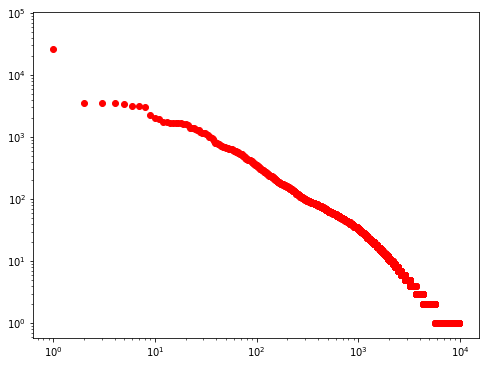

In [93]:
# x'th count = y (x sorted)
indexes = np.arange(len(ids_chars_count))

plt.figure(figsize=(8,6))
plt.plot(indexes, ids_chars_count.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

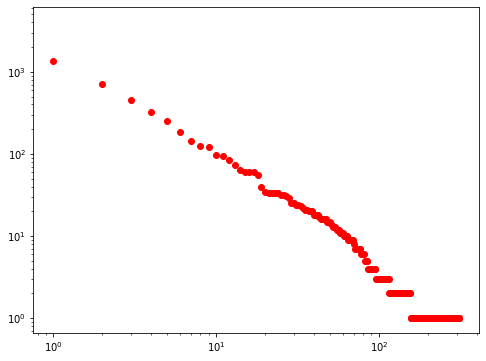

In [94]:
# 10^3 chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, counts.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

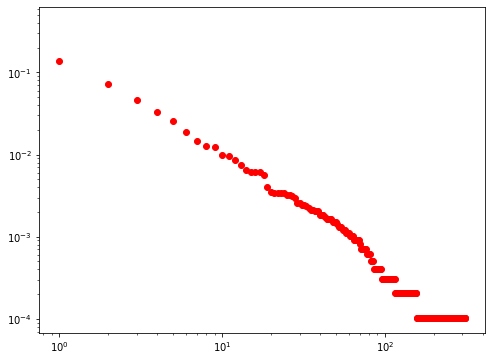

In [95]:
# 10^-1 * 100% of chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

s = sum(counts.values())

plt.figure(figsize=(8,6))
plt.plot(indexes, list(map(lambda x: x/s, counts.values())), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

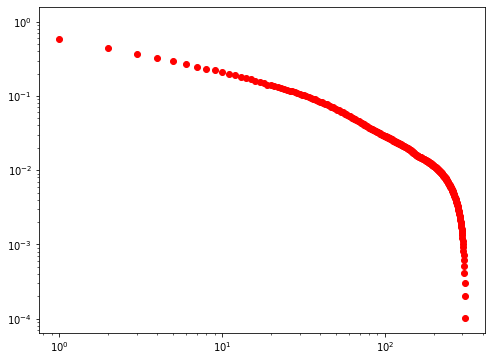

In [96]:
# CCDF

stacked_count = []
for i in range(len(counts.values())):
    stacked_count.append(sum(list(counts.values())[i:]))

s = sum(counts.values())
stacked_count = list(map(lambda x: x/s, stacked_count))

indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, stacked_count, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [97]:
print('chars', len(chars))
print('ids_chars', len(ids_chars))

chars 88937
ids_chars 9821


In [98]:
max_score = -1
for k, v in idsp.ids_score_dict.items():
    for i in v['score']:
        if i > max_score:
            max_score = i
print(max_score)

832.0


In [99]:
tokens_dict = {}
tokens = "⿰⿱⿲⿳⿴⿵⿶⿷⿸⿹⿺⿻"
for t in tokens:
    tokens_dict[t] = {'ids': [t], 'score': [max_score]}

d = tokens_dict
d.update(idsp.ids_score_dict)

register = dict(zip(d.keys(), range(1, len(d.keys())+1)))

In [105]:
with open('ids.net', 'w') as f:
    f.write(f"*Vertices\t{len(d)}\n")
    for c, i in register.items():
        f.write(f"{i}\t\"{c}\"\n")
    f.write(f"*Edges\n")
    for k, v in idsp.ids_score_dict.items():
        for ids, score in zip(v['ids'], v['score']):
            if k == ids:
                continue
            else:
                for ids_c in ids:
                    f.write(f"{register[k]}\t{register[ids_c]}\t{score/len(ids)}\n")

In [103]:
idsp.ids_score_dict

{'α': {'ids': ['α'], 'score': [376.0]},
 'ℓ': {'ids': ['ℓ'], 'score': [376.0]},
 '①': {'ids': ['①'], 'score': [376.0]},
 '②': {'ids': ['②'], 'score': [376.0]},
 '③': {'ids': ['③'], 'score': [376.0]},
 '④': {'ids': ['④'], 'score': [376.0]},
 '⑤': {'ids': ['⑤'], 'score': [376.0]},
 '⑥': {'ids': ['⑥'], 'score': [376.0]},
 '⑦': {'ids': ['⑦'], 'score': [376.0]},
 '⑧': {'ids': ['⑧'], 'score': [376.0]},
 '⑨': {'ids': ['⑨'], 'score': [376.0]},
 '⑩': {'ids': ['⑩'], 'score': [376.0]},
 '⑪': {'ids': ['⑪'], 'score': [376.0]},
 '⑫': {'ids': ['⑫'], 'score': [376.0]},
 '⑬': {'ids': ['⑬'], 'score': [376.0]},
 '⑭': {'ids': ['⑭'], 'score': [376.0]},
 '⑮': {'ids': ['⑮'], 'score': [376.0]},
 '⑯': {'ids': ['⑯'], 'score': [376.0]},
 '⑲': {'ids': ['⑲'], 'score': [376.0]},
 '△': {'ids': ['△'], 'score': [376.0]},
 '⺀': {'ids': ['⿱丶丶'], 'score': [376.0]},
 '⺄': {'ids': ['⺄'], 'score': [376.0]},
 '⺆': {'ids': ['⺆'], 'score': [376.0]},
 '⺊': {'ids': ['⺊'], 'score': [376.0]},
 '⺌': {'ids': ['⺌'], 'score': [376.0]}